In [9]:
from data_tools.api import *
from utilscht.Data import *
import pymysql
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from joblib import Parallel,delayed
import datetime
import math
%config InlineBackend.figure_format ='retina'
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

DB_INFO = dict(host='192.168.1.234',
               user='winduser',
               password='1qaz@WSX',
               db='wind')

conn = pymysql.connect(**DB_INFO, charset='utf8mb4', cursorclass=pymysql.cursors.DictCursor)

In [10]:
from numpy.lib.stride_tricks import as_strided as stride
import pandas as pd

def rolling(df, w, **kwargs):
    v = df.values
    d0, d1 = v.shape
    s0, s1 = v.strides
    
    a = stride(v, (d0 - (w - 1), w, d1), (s0, s0, s1))

    rolled_df = pd.concat({
        row: pd.DataFrame(values, columns=df.columns)
        for row, values in zip(df.index, a)
    })

    return rolled_df.groupby(level=0, **kwargs)

In [11]:
import statsmodels.api as sm

def co_intergrate(df,regress_period=10):
    
    close_1 = df["type_1"].apply(float).values
    close_2 = df["type_2"].apply(float).values
    
    model = sm.OLS(close_1,sm.add_constant(close_2))
    result = model.fit()
    resid_seq = result.resid
    params = result.params
    
    resid_std =( df["type_1"].iloc[-1] - params[0] - params[1]*df["type_2"].iloc[-1]) / np.std(resid_seq)
    
    resid_std = max(min(resid_std,5),-5)
    
    return pd.DataFrame(data = [resid_std],
                        columns = ["resid_std"]
                        ,index = [df["datetime"].iloc[-1]])

# 螺纹钢--铁矿石+焦炭

In [ ]:
df_I_daily_hq = pd.read_csv(r"data/future_data/daily_hq_I.csv")
df_J_daily_hq = pd.read_csv(r"data/future_data/daily_hq_J.csv")
df_RB_daily_hq = pd.read_csv(r"data/future_data/daily_hq_RB.csv")

df_I_daily_hq["close"].plot()
plt.show()
df_J_daily_hq["close"].plot()
plt.show()
df_RB_daily_hq["close"].plot()
plt.show()

<Figure size 1080x216 with 0 Axes>

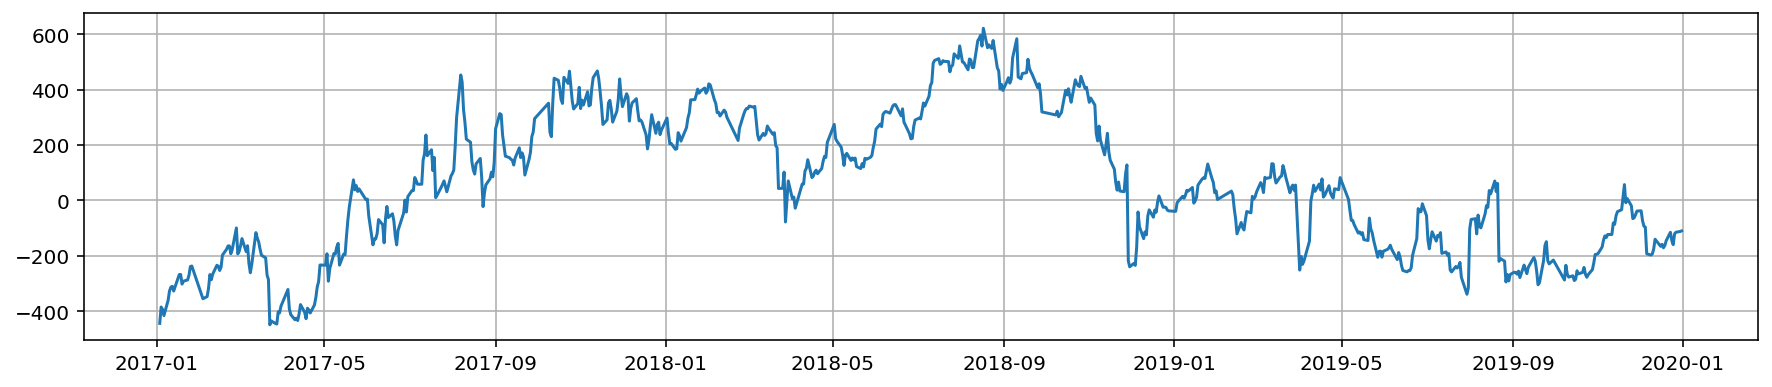

(array([ 4.,  3.,  2.,  4.,  4.,  4.,  3.,  0.,  2.,  2.,  1.,  4.,  5.,
         2.,  7.,  7., 12., 12., 12., 11., 14., 10.,  6., 17., 10.,  9.,
        13.,  5., 15.,  8., 11., 13.,  6.,  6.,  3., 13.,  8.,  7., 15.,
        10.,  3.,  8., 12., 13., 12., 17.,  8., 16.,  7., 16.,  8.,  8.,
         7.,  6.,  7., 10., 13.,  8.,  2.,  8.,  4.,  8.,  8.,  5., 15.,
         3.,  8.,  7.,  8., 10.,  9., 11., 13.,  9., 13., 10.,  3.,  8.,
         6., 10.,  7.,  8.,  6.,  8.,  3.,  6.,  5.,  3.,  6.,  7.,  1.,
         2.,  0.,  4.,  2.,  2.,  2.,  1.,  0.,  1.]),
 array([-448.8  , -438.099, -427.398, -416.697, -405.996, -395.295,
        -384.594, -373.893, -363.192, -352.491, -341.79 , -331.089,
        -320.388, -309.687, -298.986, -288.285, -277.584, -266.883,
        -256.182, -245.481, -234.78 , -224.079, -213.378, -202.677,
        -191.976, -181.275, -170.574, -159.873, -149.172, -138.471,
        -127.77 , -117.069, -106.368,  -95.667,  -84.966,  -74.265,
         -63.564,  -52.863

/home/ywang/env/dev/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  if __name__ == '__main__':


<Figure size 1080x216 with 0 Axes>

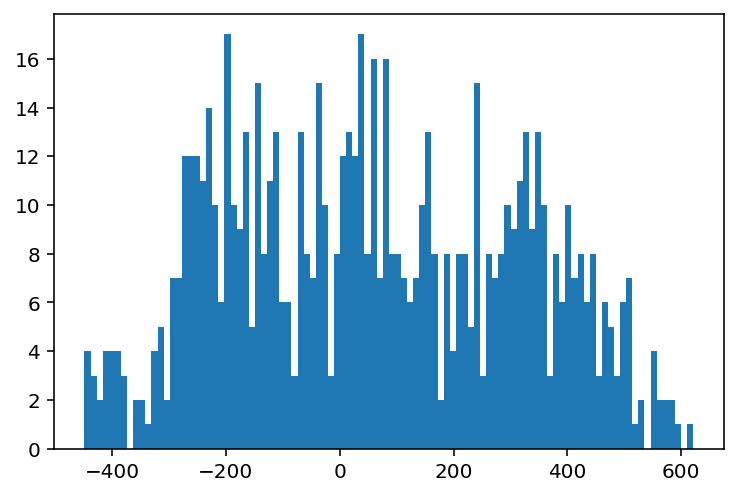

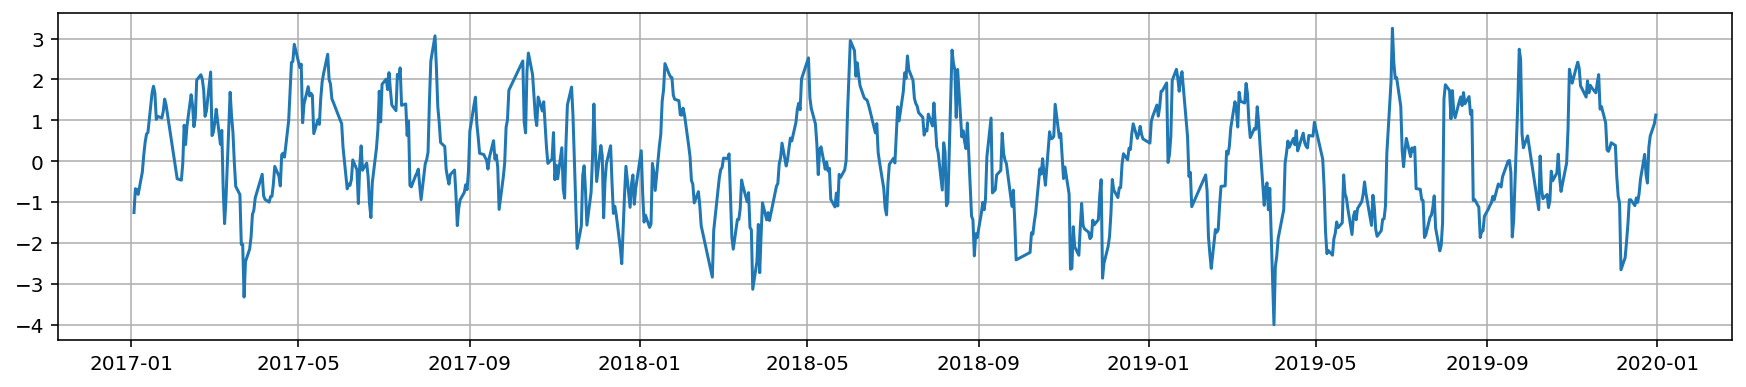

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,
         0.,  0.,  1.,  1.,  1.,  2.,  3.,  2.,  3.,  1.,  6.,  2.,  5.,
         3.,  3.,  1., 12.,  6., 10.,  9.,  9.,  9., 11.,  7., 10.,  7.,
        16., 12., 13., 18., 12., 14., 18., 17., 16., 11., 12., 15., 10.,
        12., 10., 18., 12., 15., 16., 12., 17., 17., 10.,  9., 15., 15.,
        11.,  7., 12., 17., 10., 11.,  5., 12.,  9., 17., 10., 14.,  6.,
        15.,  8.,  7.,  8.,  8., 11.,  7.,  6.,  9.,  1.,  9.,  1.,  2.,
         2.,  3.,  0.,  1.,  1.,  0.,  1.,  0.,  1.]),
 array([-4.00485669, -3.93226519, -3.85967369, -3.78708219, -3.7144907 ,
        -3.6418992 , -3.5693077 , -3.4967162 , -3.4241247 , -3.3515332 ,
        -3.27894171, -3.20635021, -3.13375871, -3.06116721, -2.98857571,
        -2.91598421, -2.84339272, -2.77080122, -2.69820972, -2.62561822,
        -2.55302672, -2.48043522, -2.40784373, -2.33525223, -2.26266073,
        -2.19006923, -2.11747773, -2.04488623, -1.97229474, -1.899703

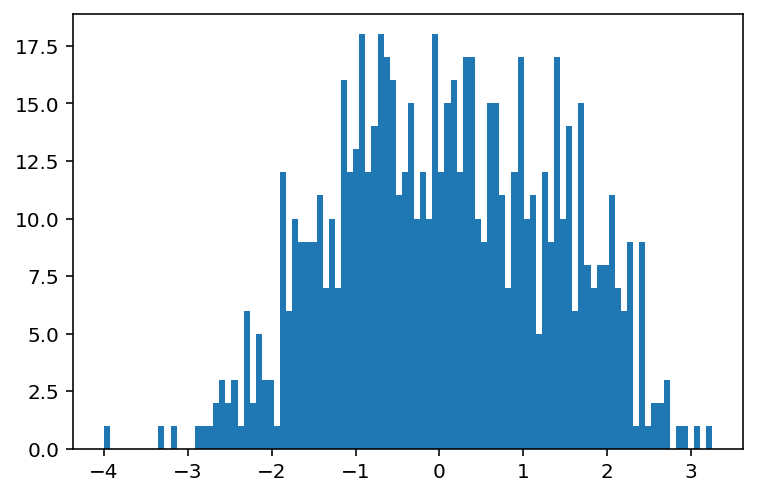

In [49]:
spread = df_RB_daily_hq["close"] - 1.6*df_I_daily_hq["close"]-0.5*df_J_daily_hq["close"]-1700
plt.figure(figsize=(15,3))
plt.plot(pd.to_datetime(get_trade_dates("20170101","20191231")),spread[244:])
plt.grid()

plt.show()
plt.hist(spread[244:],bins = 100)

spread_std = spread.rolling(20).apply(lambda x:(x[-1]-np.mean(x))/np.std(x))
plt.figure(figsize=(15,3))
plt.plot(pd.to_datetime(get_trade_dates("20170101","20191231")),spread_std[244:])
plt.grid()

plt.show()
plt.hist(spread_std[244:],bins = 100)

In [180]:
df_RB_min_hq = pd.read_csv(r"data/future_data/min_hq_RB.csv")[["datetime","close"]]
df_I_min_hq = pd.read_csv(r"data/future_data/min_hq_I.csv")[["datetime","close"]]
df_J_min_hq = pd.read_csv(r"data/future_data/min_hq_J.csv")[["datetime","close"]]

data = df_RB_min_hq.merge(df_I_min_hq,on="datetime").merge(df_J_min_hq,on="datetime")
data = data[data["datetime"]>"2019-01-01"]
data["type_1"] = data["close_x"]
data["type_2"] = 1.6*data["close_y"] + 0.5*data["close"]
data =data[["datetime","type_1","type_2"]]
data

,datetime,type_1,type_2
252075,2019-01-02 09:01:00,3400.0,1736.35
252076,2019-01-02 09:02:00,3409.0,1740.30
252077,2019-01-02 09:03:00,3413.0,1742.35
252078,2019-01-02 09:04:00,3405.0,1739.05
252079,2019-01-02 09:05:00,3406.0,1740.35
...,...,...,...
335410,2019-12-31 14:56:00,3565.0,1977.80
335411,2019-12-31 14:57:00,3569.0,1978.05
335412,2019-12-31 14:58:00,3569.0,1978.85
335413,2019-12-31 14:59:00,3570.0,1978.05


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  40 tasks      | elapsed:   14.1s
[Parallel(n_jobs=16)]: Done 130 tasks      | elapsed:   14.7s
[Parallel(n_jobs=16)]: Done 256 tasks      | elapsed:   15.8s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:   17.1s
[Parallel(n_jobs=16)]: Done 616 tasks      | elapsed:   18.9s
[Parallel(n_jobs=16)]: Done 850 tasks      | elapsed:   20.9s
[Parallel(n_jobs=16)]: Done 1120 tasks      | elapsed:   23.4s
[Parallel(n_jobs=16)]: Done 1426 tasks      | elapsed:   26.0s
[Parallel(n_jobs=16)]: Done 1768 tasks      | elapsed:   29.0s
[Parallel(n_jobs=16)]: Done 2146 tasks      | elapsed:   32.2s
[Parallel(n_jobs=16)]: Done 2560 tasks      | elapsed:   35.8s
[Parallel(n_jobs=16)]: Done 3396 tasks      | elapsed:   41.3s
[Parallel(n_jobs=16)]: Done 4368 tasks      | elapsed:   47.5s
[Parallel(n_jobs=16)]: Done 5180 out of 5211 | elapsed:   52.3s remaining:    0.3s
[Parallel(n_jobs=16)]: Done

<Figure size 1080x216 with 0 Axes>

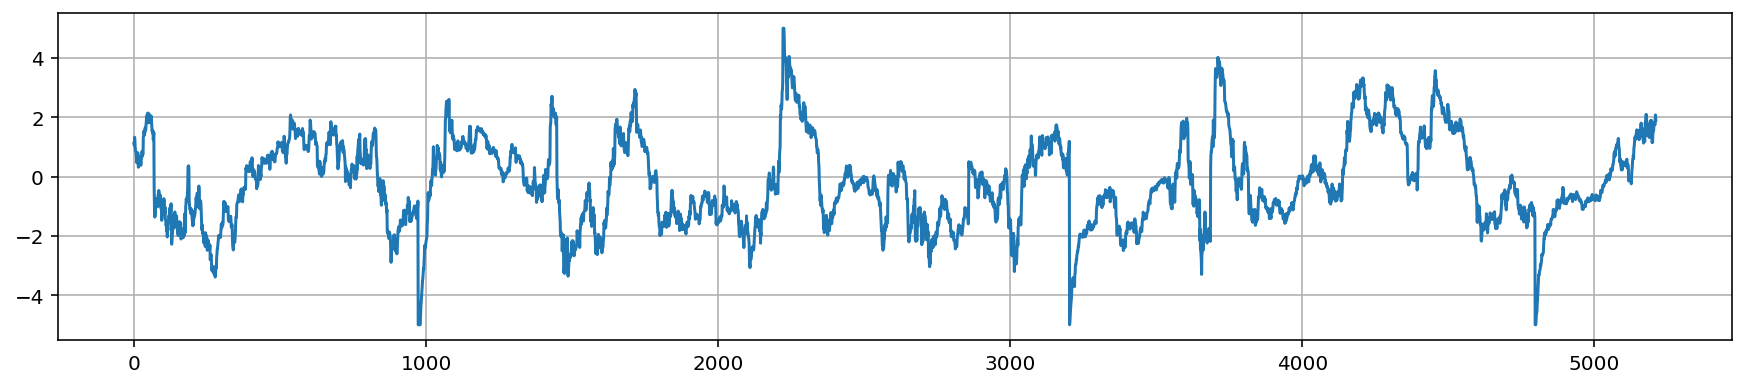

(array([ 14.,   3.,   5.,   3.,   3.,   3.,   8.,   8.,  18.,  22.,  22.,
         48.,  57., 107., 136., 193., 224., 273., 272., 254., 296., 316.,
        240., 237., 299., 205., 214., 195., 145., 204., 198., 172., 204.,
        147., 110.,  78.,  56.,  43.,  47.,  31.,  28.,  26.,  15.,  13.,
          9.,   4.,   1.,   0.,   1.,   4.]),
 array([-5. , -4.8, -4.6, -4.4, -4.2, -4. , -3.8, -3.6, -3.4, -3.2, -3. ,
        -2.8, -2.6, -2.4, -2.2, -2. , -1.8, -1.6, -1.4, -1.2, -1. , -0.8,
        -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,
         1.6,  1.8,  2. ,  2.2,  2.4,  2.6,  2.8,  3. ,  3.2,  3.4,  3.6,
         3.8,  4. ,  4.2,  4.4,  4.6,  4.8,  5. ]),
 <a list of 50 Patch objects>)

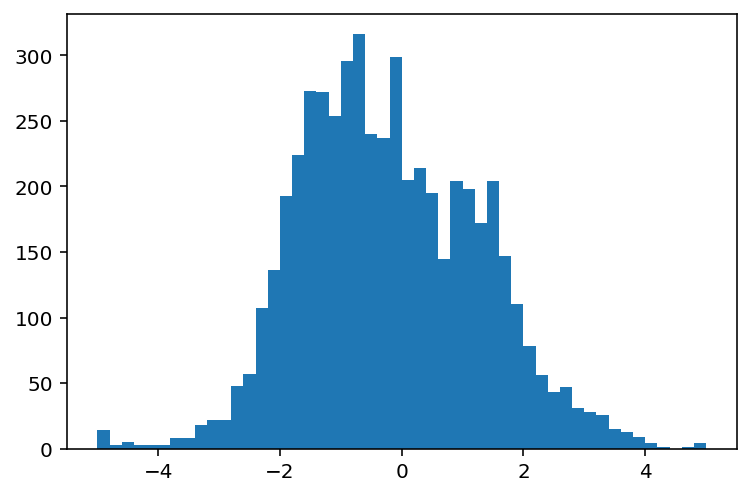

In [12]:
df_RB_min_hq = pd.read_csv(r"data/future_data/min_hq_RB.csv")[["datetime","close"]]
df_I_min_hq = pd.read_csv(r"data/future_data/min_hq_I.csv")[["datetime","close"]]
df_J_min_hq = pd.read_csv(r"data/future_data/min_hq_J.csv")[["datetime","close"]]

data = df_RB_min_hq.merge(df_I_min_hq,on="datetime").merge(df_J_min_hq,on="datetime")
data = data[data["datetime"]>"2019-01-01"]
data["type_1"] = data["close_x"]
data["type_2"] = 1.6*data["close_y"] + 0.5*data["close"]
data =data[["datetime","type_1","type_2"]]

grouped = rolling(data,w=345*15)
names = []
groups = []

count = 0
for name , group in grouped:
    count += 1
    if count % 15 ==0:
        names.append(name)
        groups.append(group)


results = Parallel(n_jobs=16, verbose=5, backend='loky', batch_size='auto') \
        (delayed(co_intergrate)(group) for group in groups)

df_result = pd.concat(results,keys = names)
df_result=df_result.reset_index().rename(columns={"level_0":"index","level_1":"datetime"})

df_result = df_result.set_index("datetime")
df_result.index = pd.to_datetime(df_result.index)

plt.figure(figsize=(15,3))
plt.plot(np.arange(len(df_result)),df_result["resid_std"])
plt.grid()

plt.show()
plt.hist(df_result["resid_std"],bins=50)

# 焦煤--焦炭

In [ ]:
df_JM_daily_hq = pd.read_csv(r"data/future_data/daily_hq_JM.csv")
df_J_daily_hq = pd.read_csv(r"data/future_data/daily_hq_J.csv")

df_JM_daily_hq["close"].plot()
plt.show()
df_J_daily_hq["close"].plot()
plt.show()

<Figure size 1080x216 with 0 Axes>

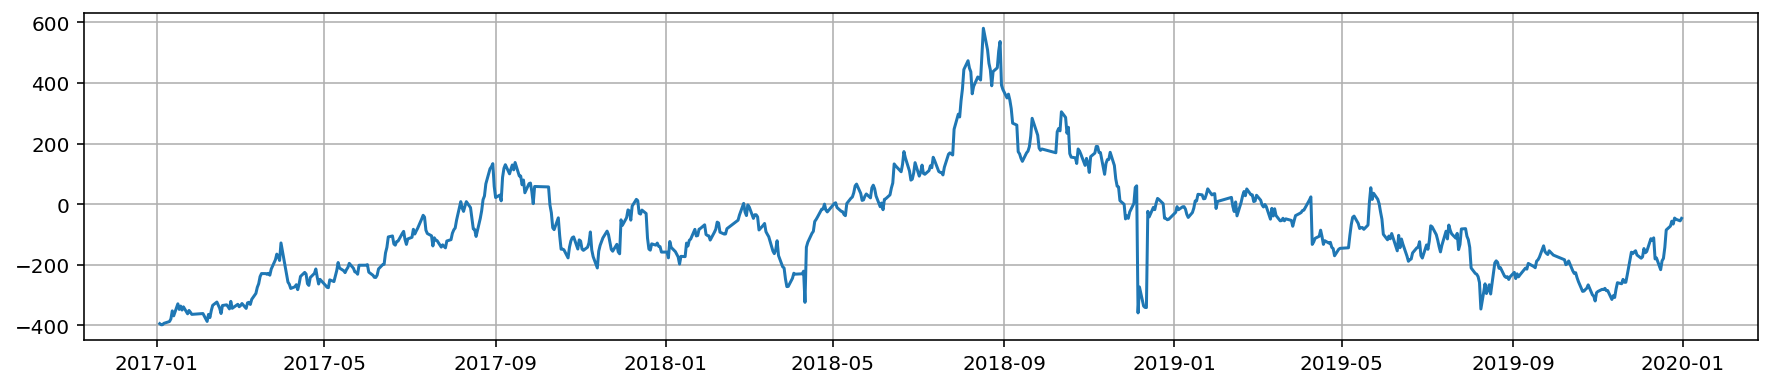

(array([ 5.,  3.,  1.,  6.,  6.,  8., 13.,  7.,  3.,  3.,  5., 10., 11.,
        12.,  7., 11., 15., 21., 11., 12., 12., 11., 13., 13., 20., 20.,
        24., 17., 26., 22., 20., 14., 19., 11.,  6., 29., 17., 13., 20.,
        19., 14., 17., 17., 15., 10.,  3., 11.,  7.,  2.,  3.,  7., 10.,
         5.,  9.,  8.,  4.,  7.,  9.,  9.,  3.,  3.,  0.,  0.,  2.,  1.,
         3.,  2.,  2.,  0.,  2.,  1.,  2.,  1.,  0.,  0.,  2.,  1.,  2.,
         0.,  2.,  3.,  0.,  1.,  2.,  0.,  2.,  4.,  0.,  1.,  1.,  0.,
         1.,  2.,  0.,  0.,  1.,  0.,  0.,  0.,  1.]),
 array([-398.9  , -389.102, -379.304, -369.506, -359.708, -349.91 ,
        -340.112, -330.314, -320.516, -310.718, -300.92 , -291.122,
        -281.324, -271.526, -261.728, -251.93 , -242.132, -232.334,
        -222.536, -212.738, -202.94 , -193.142, -183.344, -173.546,
        -163.748, -153.95 , -144.152, -134.354, -124.556, -114.758,
        -104.96 ,  -95.162,  -85.364,  -75.566,  -65.768,  -55.97 ,
         -46.172,  -36.374

/home/ywang/env/dev/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  if __name__ == '__main__':


<Figure size 1080x216 with 0 Axes>

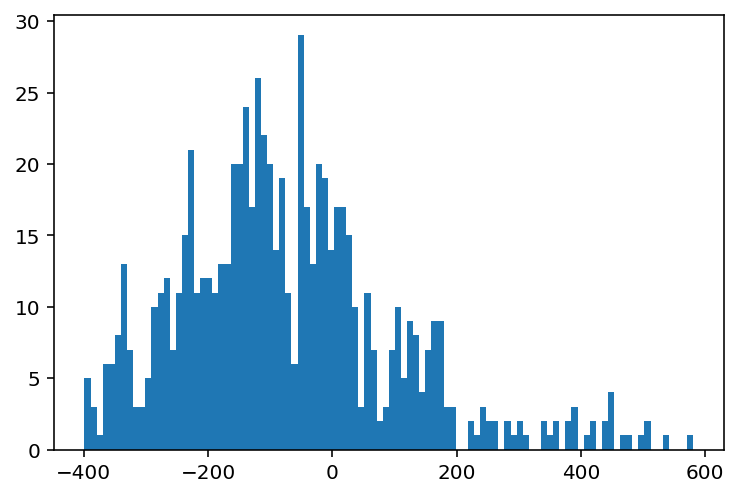

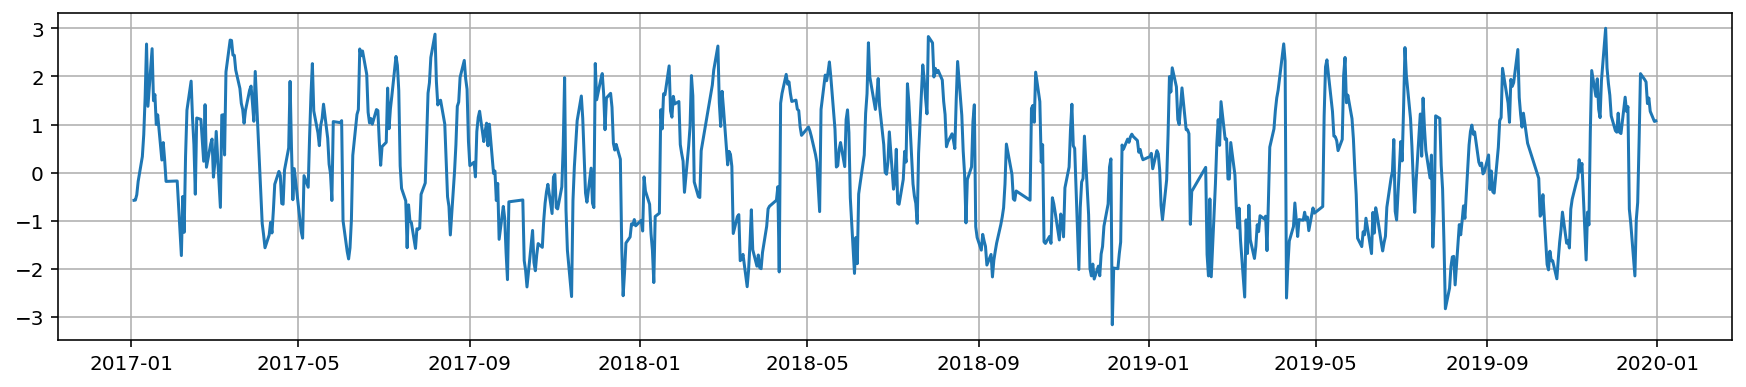

(array([ 1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  4.,  0.,  0.,  3.,
         1.,  1.,  3.,  6.,  4.,  8.,  5.,  5.,  7.,  5.,  9.,  8., 11.,
         6., 13.,  7.,  9., 10.,  7.,  5., 11.,  8., 20.,  7., 14.,  6.,
        18., 11., 14., 11.,  7.,  9.,  6.,  5.,  8., 10., 13.,  9.,  9.,
         6., 16., 10., 10.,  6., 11.,  9., 10., 19., 15., 13.,  9., 11.,
        13.,  9.,  8., 13., 15., 11.,  9., 21.,  7., 13., 13.,  9., 13.,
         6.,  7.,  4.,  8., 10.,  8., 10.,  8.,  5.,  3.,  5.,  2.,  6.,
         0.,  2.,  3.,  3.,  3.,  1.,  1.,  1.,  1.]),
 array([-3.16385384, -3.1022045 , -3.04055516, -2.97890582, -2.91725648,
        -2.85560714, -2.7939578 , -2.73230846, -2.67065912, -2.60900978,
        -2.54736044, -2.4857111 , -2.42406176, -2.36241242, -2.30076308,
        -2.23911374, -2.1774644 , -2.11581506, -2.05416572, -1.99251638,
        -1.93086704, -1.8692177 , -1.80756836, -1.74591902, -1.68426968,
        -1.62262034, -1.560971  , -1.49932166, -1.43767232, -1.376022

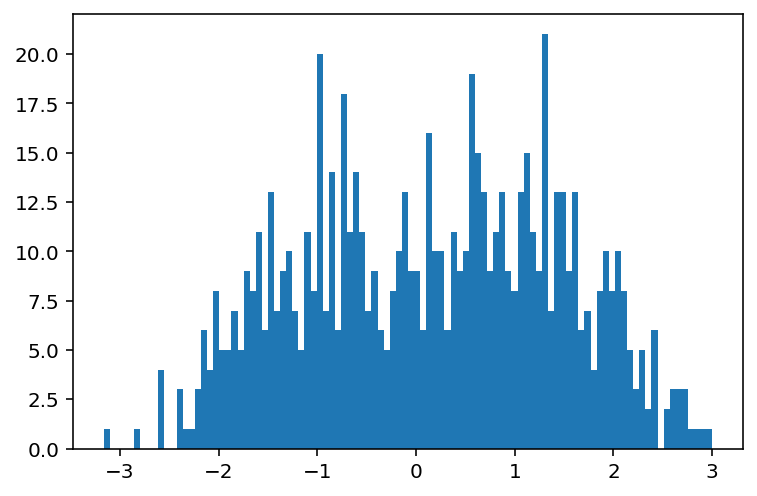

In [48]:
spread = df_J_daily_hq["close"] - df_JM_daily_hq["close"]*1.4-300
plt.figure(figsize=(15,3))
plt.plot(pd.to_datetime(get_trade_dates("20170101","20191231")),spread[244:])
plt.grid()

plt.show()
plt.hist(spread[244:],bins = 100)

spread_std = spread.rolling(15).apply(lambda x:(x[-1]-np.mean(x))/np.std(x))
plt.figure(figsize=(15,3))
plt.plot(pd.to_datetime(get_trade_dates("20170101","20191231")),spread_std[244:])
plt.grid()

plt.show()
plt.hist(spread_std[244:],bins = 100)

[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  40 tasks      | elapsed:   14.2s
[Parallel(n_jobs=16)]: Done 130 tasks      | elapsed:   15.0s
[Parallel(n_jobs=16)]: Done 256 tasks      | elapsed:   16.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:   17.6s
[Parallel(n_jobs=16)]: Done 616 tasks      | elapsed:   19.3s
[Parallel(n_jobs=16)]: Done 850 tasks      | elapsed:   21.4s
[Parallel(n_jobs=16)]: Done 1120 tasks      | elapsed:   23.9s
[Parallel(n_jobs=16)]: Done 1426 tasks      | elapsed:   26.4s
[Parallel(n_jobs=16)]: Done 1768 tasks      | elapsed:   29.3s
[Parallel(n_jobs=16)]: Done 2146 tasks      | elapsed:   32.7s
[Parallel(n_jobs=16)]: Done 2560 tasks      | elapsed:   36.5s
[Parallel(n_jobs=16)]: Done 3010 tasks      | elapsed:   40.4s
[Parallel(n_jobs=16)]: Done 3496 tasks      | elapsed:   44.7s
[Parallel(n_jobs=16)]: Done 4018 tasks      | elapsed:   49.1s
[Parallel(n_jobs=16)]: Done 4576 tasks      | e

<Figure size 1080x216 with 0 Axes>

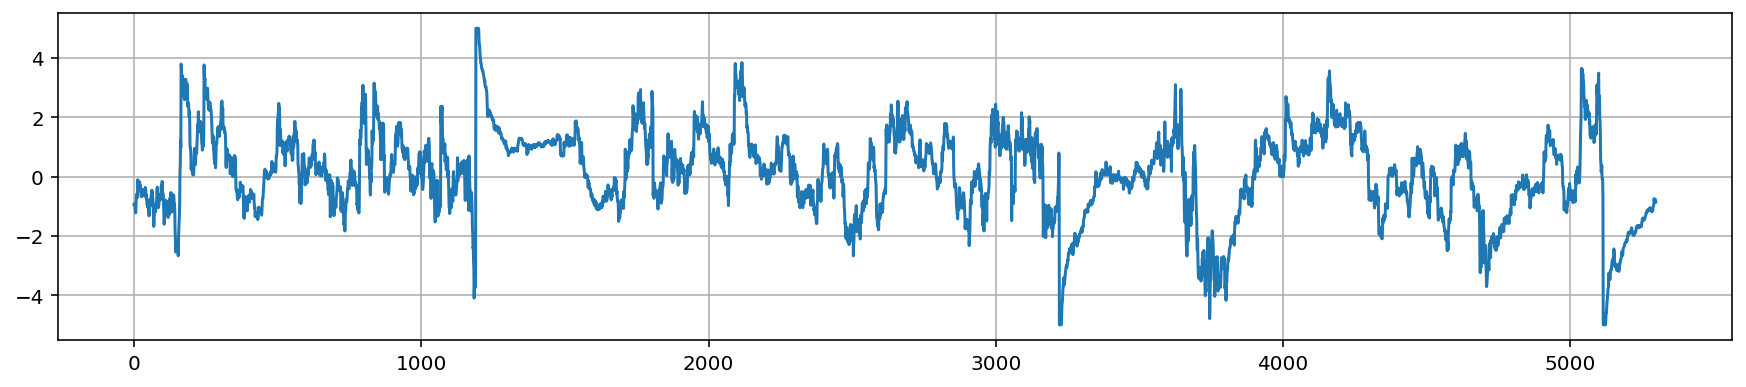

(array([ 18.,   2.,   4.,   3.,   7.,   5.,  20.,  24.,  26.,  43.,  41.,
         34.,  39.,  61.,  83.,  82.,  89., 111., 128., 203., 232., 260.,
        295., 267., 291., 316., 259., 267., 294., 327., 383., 245., 171.,
        190., 112.,  88.,  66.,  46.,  35.,  33.,  30.,  22.,  13.,  12.,
          4.,   2.,   1.,   2.,   1.,  11.]),
 array([-5. , -4.8, -4.6, -4.4, -4.2, -4. , -3.8, -3.6, -3.4, -3.2, -3. ,
        -2.8, -2.6, -2.4, -2.2, -2. , -1.8, -1.6, -1.4, -1.2, -1. , -0.8,
        -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,
         1.6,  1.8,  2. ,  2.2,  2.4,  2.6,  2.8,  3. ,  3.2,  3.4,  3.6,
         3.8,  4. ,  4.2,  4.4,  4.6,  4.8,  5. ]),
 <a list of 50 Patch objects>)

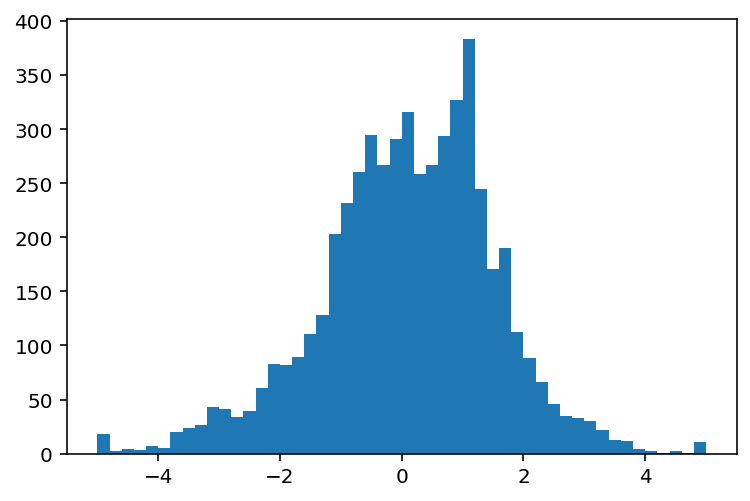

In [13]:
df_JM_min_hq = pd.read_csv(r"data/future_data/min_hq_JM.csv").iloc[-245*345-120:]
df_J_min_hq = pd.read_csv(r"data/future_data/min_hq_J.csv").iloc[-245*345-120:]

data = pd.concat([df_JM_min_hq["datetime"],df_JM_min_hq["close"],df_J_min_hq["close"]]
                  ,axis = 1,keys=["datetime","type_1","type_2"])



grouped = rolling(data,w=345*15)
names = []
groups = []

count = 0
for name , group in grouped:
    count += 1
    if count % 15 ==0:
        names.append(name)
        groups.append(group)


results = Parallel(n_jobs=16, verbose=5, backend='loky', batch_size='auto') \
        (delayed(co_intergrate)(group) for group in groups)

df_result = pd.concat(results,keys = names)
df_result=df_result.reset_index().rename(columns={"level_0":"index","level_1":"datetime"})

df_result = df_result.set_index("datetime")
df_result.index = pd.to_datetime(df_result.index)

plt.figure(figsize=(15,3))
plt.plot(np.arange(len(df_result)),df_result["resid_std"])
plt.grid()

plt.show()
plt.hist(df_result["resid_std"],bins=50)

# 聚丙烯 --甲醇

In [ ]:
df_PP_daily_hq = pd.read_csv(r"data/future_data/daily_hq_PP.csv")
df_MA_daily_hq = pd.read_csv(r"data/future_data/daily_hq_MA.csv")

df_PP_daily_hq["close"].plot()
plt.show()
df_MA_daily_hq["close"].plot()
plt.show()

<Figure size 1080x216 with 0 Axes>

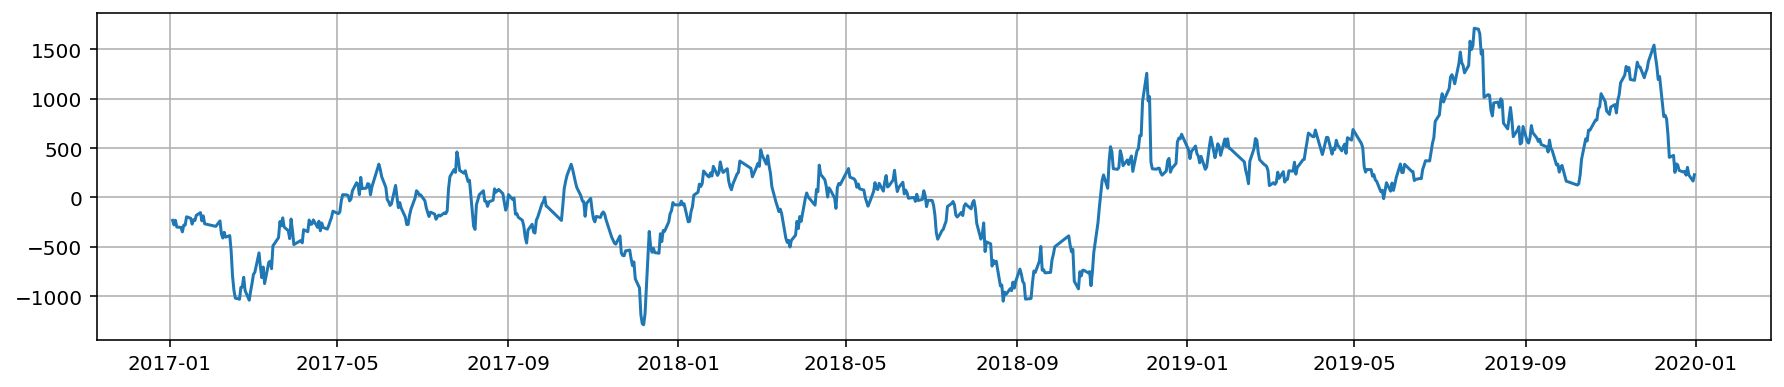

(array([ 2.,  0.,  0.,  2.,  0.,  0.,  0.,  1.,  6.,  0.,  1.,  5.,  6.,
         6.,  5.,  2.,  4.,  9.,  7.,  4.,  1.,  7.,  1.,  3., 10.,  3.,
         6.,  9.,  7.,  9.,  6., 14., 10., 15., 15., 16., 18., 17., 10.,
        14., 20., 24., 15., 16., 13., 23., 16., 22., 18., 14., 19., 27.,
        24., 19., 16., 13.,  9.,  8., 12., 12., 10., 11., 12., 12.,  4.,
         5.,  4.,  2.,  1.,  5.,  5.,  2.,  3.,  4.,  2.,  8.,  4.,  5.,
         0.,  1.,  0.,  2.,  3.,  4.,  5.,  2.,  3.,  5.,  4.,  0.,  2.,
         2.,  2.,  0.,  2.,  1.,  0.,  0.,  1.,  2.]),
 array([-1290.  , -1259.96, -1229.92, -1199.88, -1169.84, -1139.8 ,
        -1109.76, -1079.72, -1049.68, -1019.64,  -989.6 ,  -959.56,
         -929.52,  -899.48,  -869.44,  -839.4 ,  -809.36,  -779.32,
         -749.28,  -719.24,  -689.2 ,  -659.16,  -629.12,  -599.08,
         -569.04,  -539.  ,  -508.96,  -478.92,  -448.88,  -418.84,
         -388.8 ,  -358.76,  -328.72,  -298.68,  -268.64,  -238.6 ,
         -208.56,  -178.52

/home/ywang/env/dev/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  if __name__ == '__main__':


<Figure size 1080x216 with 0 Axes>

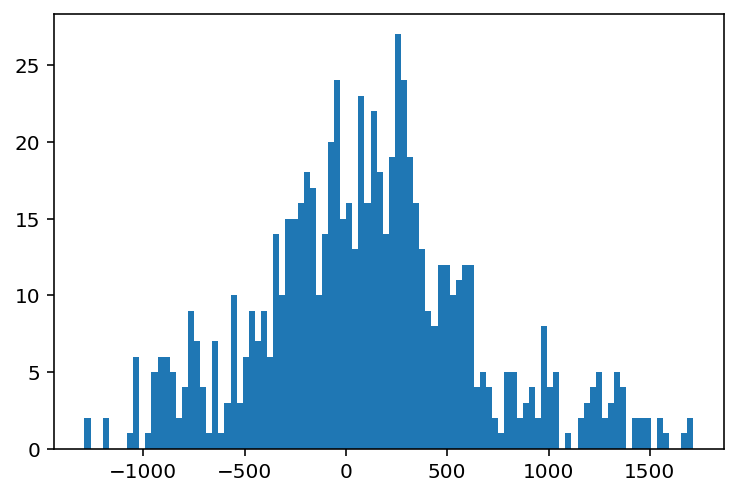

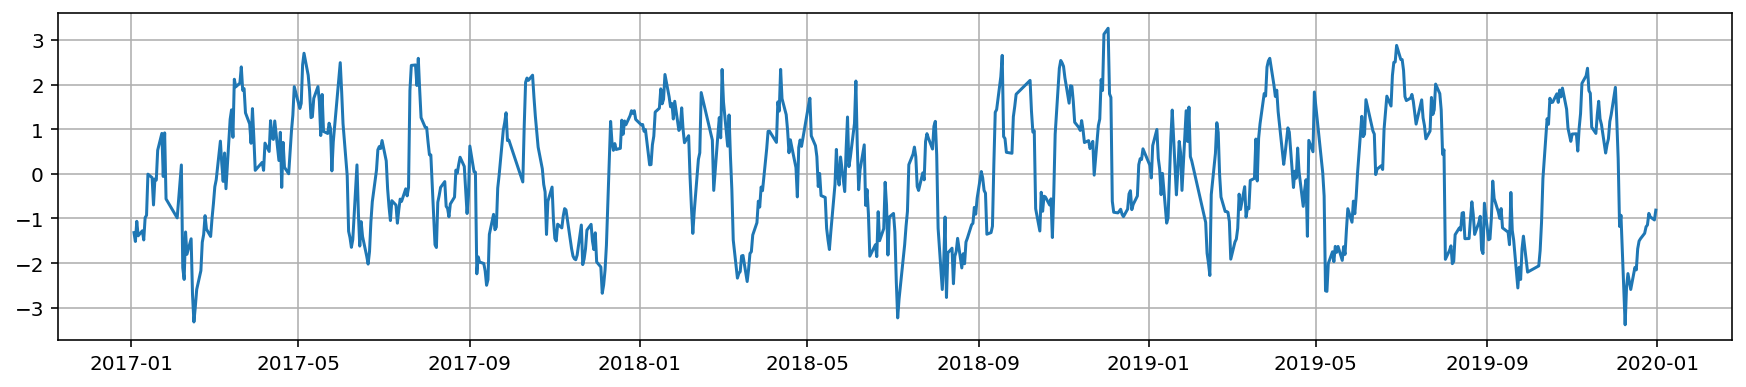

(array([ 2.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,  2.,  5.,  2.,
         3.,  3.,  4.,  1.,  5.,  5.,  6.,  8.,  6.,  7., 11.,  9., 10.,
         9.,  6., 13., 13., 10., 13., 11.,  9., 12.,  8., 14., 15., 14.,
        14.,  8., 10.,  6., 15.,  8., 14., 11.,  3., 11.,  9.,  9., 13.,
         9.,  9.,  8.,  6.,  9., 10., 10., 16., 11., 17., 16., 10., 18.,
        17., 11., 14., 11., 11., 12.,  9., 13.,  8.,  5., 12., 13.,  9.,
         6.,  9.,  8.,  4.,  5.,  4.,  4.,  1.,  6.,  4.,  5.,  5.,  1.,
         1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  1.]),
 array([-3.37985779, -3.31346596, -3.24707413, -3.1806823 , -3.11429046,
        -3.04789863, -2.9815068 , -2.91511497, -2.84872314, -2.78233131,
        -2.71593947, -2.64954764, -2.58315581, -2.51676398, -2.45037215,
        -2.38398032, -2.31758848, -2.25119665, -2.18480482, -2.11841299,
        -2.05202116, -1.98562933, -1.91923749, -1.85284566, -1.78645383,
        -1.720062  , -1.65367017, -1.58727834, -1.5208865 , -1.454494

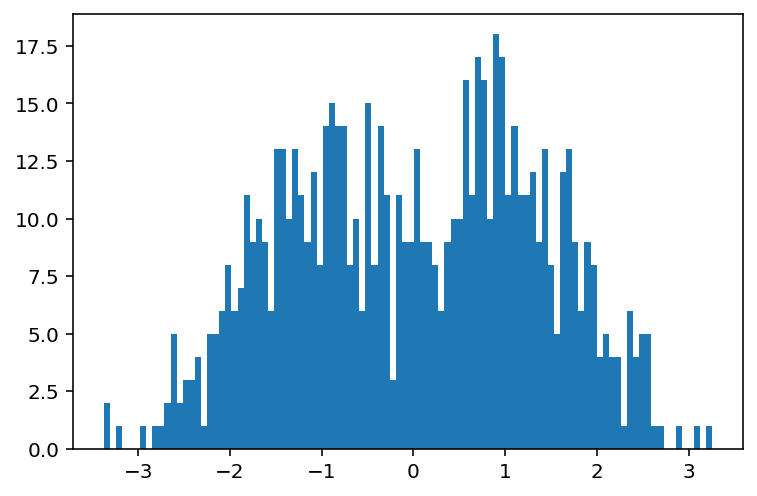

In [54]:
spread = df_PP_daily_hq["close"] - df_MA_daily_hq["close"]*3 -800
plt.figure(figsize=(15,3))
plt.plot(pd.to_datetime(get_trade_dates("20170101","20191231")),spread[244:])
plt.grid()

plt.show()
plt.hist(spread[244:],bins = 100)

spread_std = spread.rolling(20).apply(lambda x:(x[-1]-np.mean(x))/np.std(x))
plt.figure(figsize=(15,3))
plt.plot(pd.to_datetime(get_trade_dates("20170101","20191231")),spread_std[244:])
plt.grid()

plt.show()
plt.hist(spread_std[244:],bins = 100)

In [178]:
df_PP_min_hq = pd.read_csv(r"data/future_data/min_hq_PP.csv")[["datetime","close"]]
df_MA_min_hq = pd.read_csv(r"data/future_data/min_hq_MA.csv")[["datetime","close"]]

data = pd.merge(df_PP_min_hq,df_MA_min_hq,on = ["datetime"]).rename(columns = {"close_x":"type_1","close_y":"type_2"})
data = data[data["datetime"]>"2019-01-01"]
data

,datetime,type_1,type_2
164475,2019-01-02 09:01:00,8608.0,2398.0
164476,2019-01-02 09:02:00,8610.0,2401.0
164477,2019-01-02 09:03:00,8609.0,2408.0
164478,2019-01-02 09:04:00,8590.0,2398.0
164479,2019-01-02 09:05:00,8586.0,2407.0
...,...,...,...
241090,2019-12-31 14:56:00,7571.0,2187.0
241091,2019-12-31 14:57:00,7570.0,2187.0
241092,2019-12-31 14:58:00,7575.0,2187.0
241093,2019-12-31 14:59:00,7579.0,2186.0


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  40 tasks      | elapsed:   12.9s
[Parallel(n_jobs=16)]: Done 130 tasks      | elapsed:   13.6s
[Parallel(n_jobs=16)]: Done 256 tasks      | elapsed:   14.7s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:   16.1s
[Parallel(n_jobs=16)]: Done 616 tasks      | elapsed:   17.7s
[Parallel(n_jobs=16)]: Done 850 tasks      | elapsed:   19.8s
[Parallel(n_jobs=16)]: Done 1120 tasks      | elapsed:   22.1s
[Parallel(n_jobs=16)]: Done 1426 tasks      | elapsed:   24.7s
[Parallel(n_jobs=16)]: Done 1768 tasks      | elapsed:   27.6s
[Parallel(n_jobs=16)]: Done 2146 tasks      | elapsed:   30.8s
[Parallel(n_jobs=16)]: Done 2560 tasks      | elapsed:   34.5s
[Parallel(n_jobs=16)]: Done 3010 tasks      | elapsed:   38.4s
[Parallel(n_jobs=16)]: Done 3496 tasks      | elapsed:   42.7s
[Parallel(n_jobs=16)]: Done 4018 tasks      | elapsed:   47.2s
[Parallel(n_jobs=16)]: Done 4576 tasks      | e

<Figure size 1080x216 with 0 Axes>

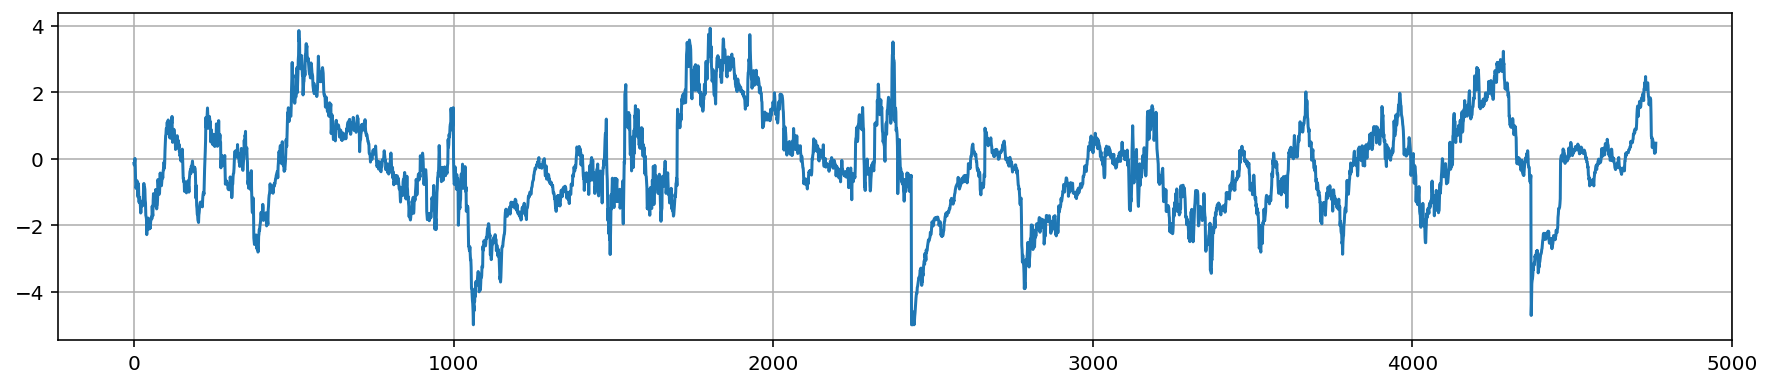

(array([  9.,   3.,   5.,   4.,   5.,   7.,  18.,  17.,  16.,  21.,  24.,
         24.,  40.,  57.,  75.,  81.,  81., 113., 146., 174., 165., 181.,
        210., 258., 243., 251., 280., 285., 272., 292., 159., 137., 135.,
        142.,  98.,  92.,  82.,  74.,  81.,  80.,  66.,  52.,  53.,  48.,
         49.,  23.,  13.,  12.,   8.,   2.]),
 array([-5.00000000e+00, -4.82151772e+00, -4.64303544e+00, -4.46455316e+00,
        -4.28607088e+00, -4.10758860e+00, -3.92910632e+00, -3.75062405e+00,
        -3.57214177e+00, -3.39365949e+00, -3.21517721e+00, -3.03669493e+00,
        -2.85821265e+00, -2.67973037e+00, -2.50124809e+00, -2.32276581e+00,
        -2.14428353e+00, -1.96580125e+00, -1.78731897e+00, -1.60883669e+00,
        -1.43035442e+00, -1.25187214e+00, -1.07338986e+00, -8.94907577e-01,
        -7.16425298e-01, -5.37943019e-01, -3.59460740e-01, -1.80978460e-01,
        -2.49618100e-03,  1.75986098e-01,  3.54468377e-01,  5.32950657e-01,
         7.11432936e-01,  8.89915215e-01,  1.06839

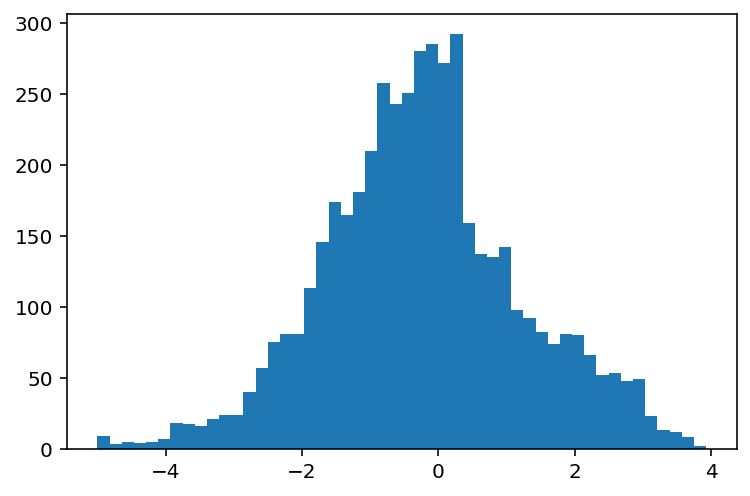

In [14]:
df_PP_min_hq = pd.read_csv(r"data/future_data/min_hq_PP.csv")[["datetime","close"]]
df_MA_min_hq = pd.read_csv(r"data/future_data/min_hq_MA.csv")[["datetime","close"]]

data = pd.merge(df_PP_min_hq,df_MA_min_hq,on = ["datetime"]).rename(columns = {"close_x":"type_1","close_y":"type_2"})
data = data[data["datetime"]>"2019-01-01"]

grouped = rolling(data,w=345*15)
names = []
groups = []

count = 0
for name , group in grouped:
    count += 1
    if count % 15 ==0:
        names.append(name)
        groups.append(group)


results = Parallel(n_jobs=16, verbose=5, backend='loky', batch_size='auto') \
        (delayed(co_intergrate)(group) for group in groups)

df_result = pd.concat(results,keys = names)
df_result=df_result.reset_index().rename(columns={"level_0":"index","level_1":"datetime"})

df_result = df_result.set_index("datetime")
df_result.index = pd.to_datetime(df_result.index)

plt.figure(figsize=(15,3))
plt.plot(np.arange(len(df_result)),df_result["resid_std"])
plt.grid()

plt.show()
plt.hist(df_result["resid_std"],bins=50)

# 鸡蛋-- 豆粕+玉米

In [ ]:
df_JD_daily_hq = pd.read_csv(r"data/future_data/daily_hq_JD.csv")
df_M_daily_hq = pd.read_csv(r"data/future_data/daily_hq_M.csv")
df_C_daily_hq = pd.read_csv(r"data/future_data/daily_hq_C.csv")

df_JD_daily_hq["close"].plot()
plt.show()
df_M_daily_hq["close"].plot()
plt.show()
df_C_daily_hq["close"].plot()
plt.show()

<Figure size 1080x216 with 0 Axes>

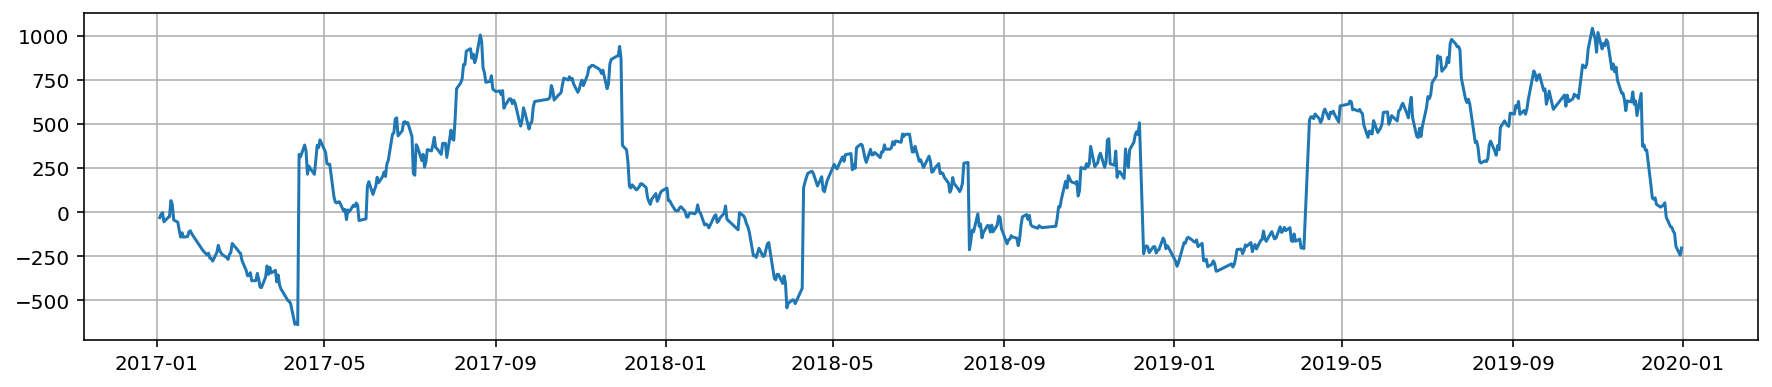

(array([ 3.,  0.,  0.,  0.,  0.,  1.,  1.,  3.,  3.,  0.,  0.,  0.,  4.,
         2.,  4.,  3.,  7.,  4.,  5.,  5.,  5.,  6.,  7., 10., 11., 18.,
        14., 10., 16., 12.,  5., 17.,  8., 19.,  5.,  8., 13., 11., 10.,
         6., 10., 11.,  7.,  3.,  5.,  9., 11.,  9.,  7.,  9.,  7., 11.,
         6., 12., 19., 12.,  8., 11., 14., 14., 15., 11.,  5.,  8., 10.,
         5.,  6.,  8., 14.,  9.,  6., 14., 12., 10.,  9., 12., 12.,  9.,
        10.,  8.,  2.,  7.,  7.,  7.,  4.,  6.,  8.,  9.,  3.,  6.,  5.,
         2.,  2.,  6.,  4.,  2.,  3.,  1.,  2.,  1.]),
 array([-6.395000e+02, -6.226750e+02, -6.058500e+02, -5.890250e+02,
        -5.722000e+02, -5.553750e+02, -5.385500e+02, -5.217250e+02,
        -5.049000e+02, -4.880750e+02, -4.712500e+02, -4.544250e+02,
        -4.376000e+02, -4.207750e+02, -4.039500e+02, -3.871250e+02,
        -3.703000e+02, -3.534750e+02, -3.366500e+02, -3.198250e+02,
        -3.030000e+02, -2.861750e+02, -2.693500e+02, -2.525250e+02,
        -2.357000e+02, -2.

/home/ywang/env/dev/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  if __name__ == '__main__':


<Figure size 1080x216 with 0 Axes>

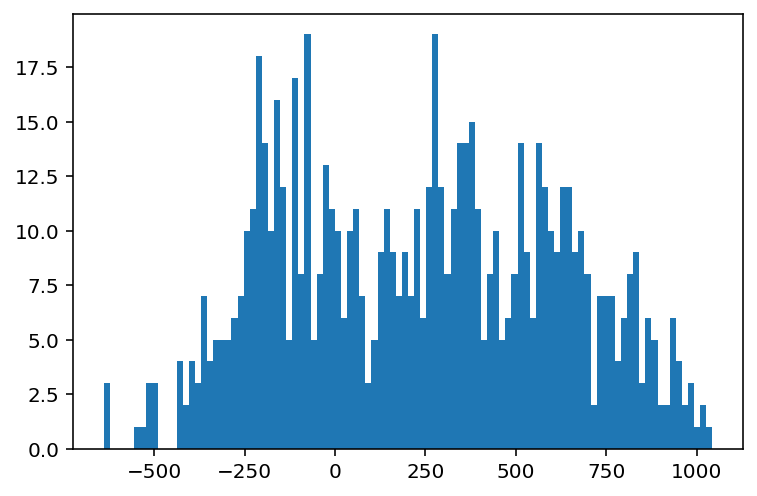

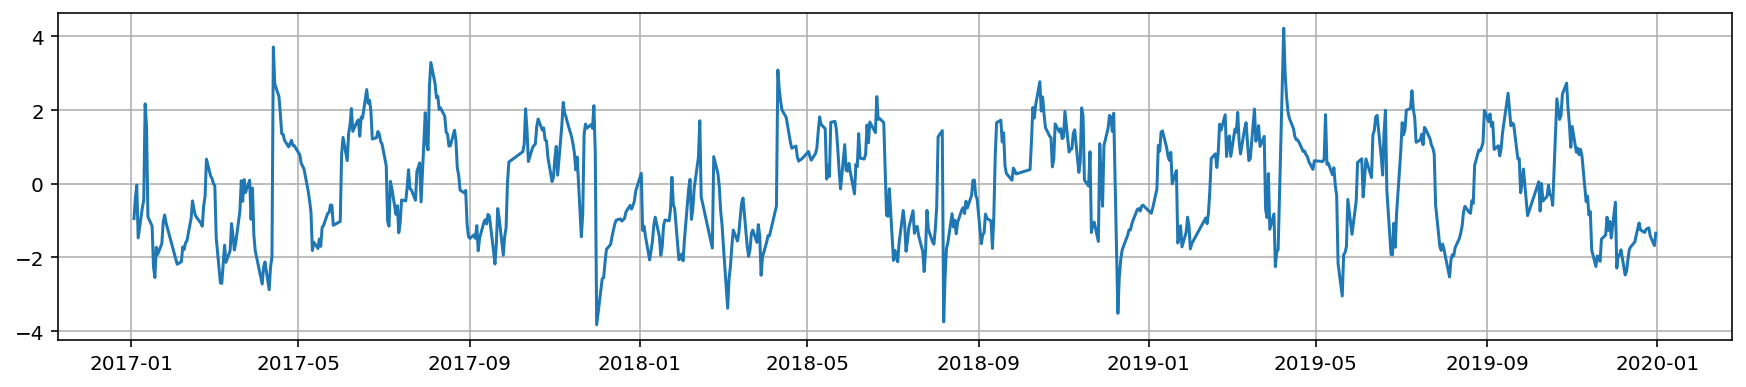

(array([ 2.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  2.,  0.,
         2.,  1.,  5.,  4.,  1.,  1.,  7.,  4., 12.,  6., 14.,  9., 19.,
        16., 16.,  9., 16., 17., 11., 14., 19., 19., 15., 14., 19., 15.,
        13., 13., 13.,  6., 10.,  4., 13.,  7.,  8., 10.,  8.,  7.,  8.,
        13.,  9.,  8., 19., 18., 11., 15., 15., 18., 16., 10., 12., 19.,
        17., 14., 13., 13., 11., 12.,  8., 15.,  5.,  4.,  2.,  4.,  4.,
         2.,  2.,  1.,  4.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([-3.82891842, -3.74842681, -3.66793519, -3.58744358, -3.50695197,
        -3.42646035, -3.34596874, -3.26547713, -3.18498551, -3.1044939 ,
        -3.02400228, -2.94351067, -2.86301906, -2.78252744, -2.70203583,
        -2.62154422, -2.5410526 , -2.46056099, -2.38006938, -2.29957776,
        -2.21908615, -2.13859453, -2.05810292, -1.97761131, -1.89711969,
        -1.81662808, -1.73613647, -1.65564485, -1.57515324, -1.494661

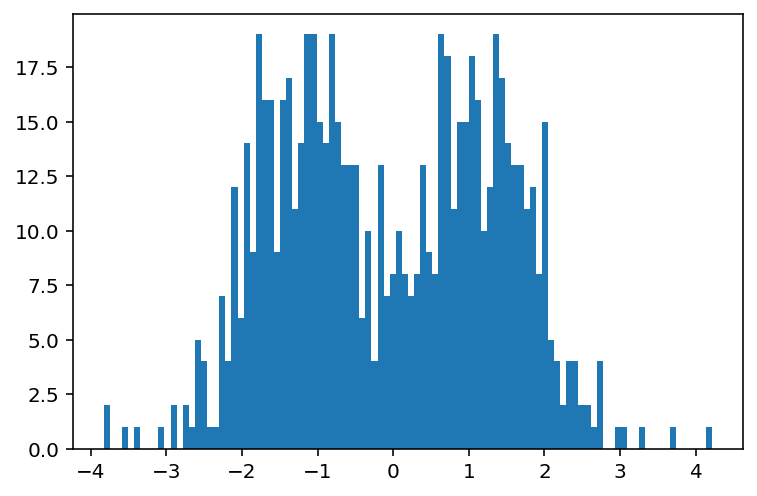

In [56]:
spread = df_JD_daily_hq["close"] - 1*df_C_daily_hq["close"]-0.5*df_M_daily_hq["close"]-500
plt.figure(figsize=(15,3))
plt.plot(pd.to_datetime(get_trade_dates("20170101","20191231")),spread[244:])
plt.grid()

plt.show()
plt.hist(spread[244:],bins = 100)

spread_std = spread.rolling(20).apply(lambda x:(x[-1]-np.mean(x))/np.std(x))
plt.figure(figsize=(15,3))
plt.plot(pd.to_datetime(get_trade_dates("20170101","20191231")),spread_std[244:])
plt.grid()

plt.show()
plt.hist(spread_std[244:],bins = 100)

In [182]:
df_JD_min_hq = pd.read_csv(r"data/future_data/min_hq_JD.csv")[["datetime","close"]]
df_C_min_hq = pd.read_csv(r"data/future_data/min_hq_C.csv")[["datetime","close"]]
df_M_min_hq = pd.read_csv(r"data/future_data/min_hq_M.csv")[["datetime","close"]]

data = df_JD_min_hq.merge(df_C_min_hq,on="datetime").merge(df_M_min_hq,on="datetime")
data = data[data["datetime"]>"2019-01-01"]
data["type_1"] = data["close_x"]
data["type_2"] = 1*data["close_y"] + 0.5*data["close"]
data =data[["datetime","type_1","type_2"]]
data

,datetime,type_1,type_2
164475,2019-01-02 09:01:00,3469.0,3175.5
164476,2019-01-02 09:02:00,3469.0,3176.5
164477,2019-01-02 09:03:00,3472.0,3174.0
164478,2019-01-02 09:04:00,3466.0,3172.0
164479,2019-01-02 09:05:00,3467.0,3174.0
...,...,...,...
219370,2019-12-31 14:56:00,3589.0,3298.0
219371,2019-12-31 14:57:00,3588.0,3298.0
219372,2019-12-31 14:58:00,3590.0,3298.0
219373,2019-12-31 14:59:00,3590.0,3298.0


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  40 tasks      | elapsed:   10.8s
[Parallel(n_jobs=16)]: Done 130 tasks      | elapsed:   11.5s
[Parallel(n_jobs=16)]: Done 256 tasks      | elapsed:   12.6s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:   13.9s
[Parallel(n_jobs=16)]: Done 616 tasks      | elapsed:   15.6s
[Parallel(n_jobs=16)]: Done 850 tasks      | elapsed:   17.6s
[Parallel(n_jobs=16)]: Done 1120 tasks      | elapsed:   20.0s
[Parallel(n_jobs=16)]: Done 1426 tasks      | elapsed:   22.6s
[Parallel(n_jobs=16)]: Done 1768 tasks      | elapsed:   25.7s
[Parallel(n_jobs=16)]: Done 2146 tasks      | elapsed:   28.8s
[Parallel(n_jobs=16)]: Done 2560 tasks      | elapsed:   32.1s
[Parallel(n_jobs=16)]: Done 3010 tasks      | elapsed:   35.9s
[Parallel(n_jobs=16)]: Done 3315 out of 3315 | elapsed:   38.4s finished


<Figure size 1080x216 with 0 Axes>

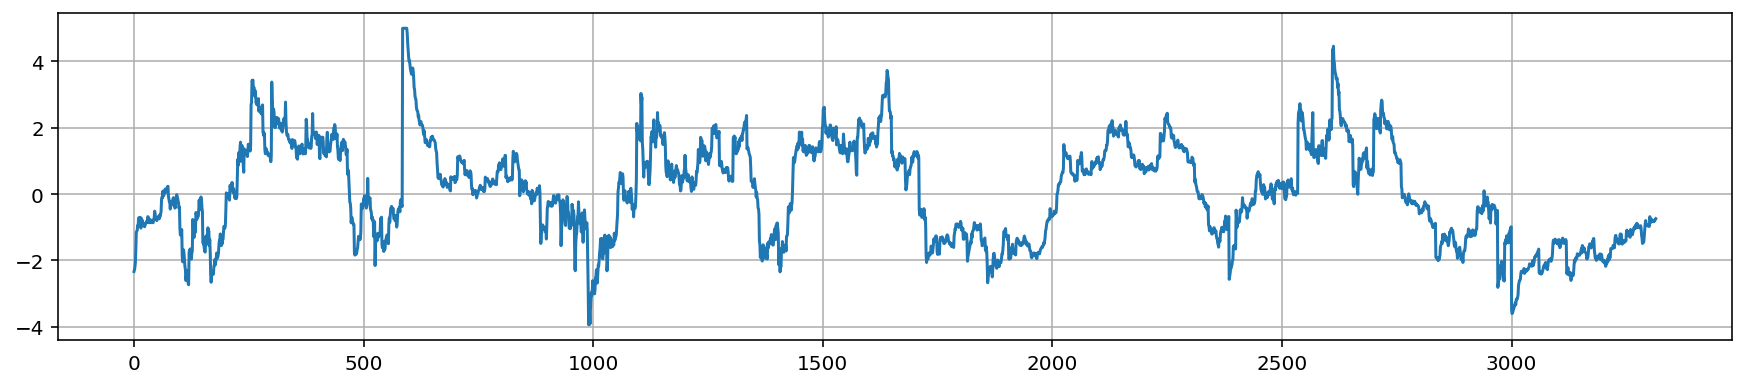

(array([  3.,   2.,   6.,   4.,   6.,   6.,   8.,  19.,  49.,  55.,  73.,
        116., 121., 156., 165., 121., 138., 109.,  83., 109., 126., 125.,
        107., 115., 128., 114., 111., 134., 154., 177., 131., 141., 101.,
         99.,  62.,  30.,  22.,  16.,  17.,   7.,   5.,  10.,  10.,   3.,
          4.,   2.,   3.,   1.,   0.,  11.]),
 array([-3.93850906, -3.75973887, -3.58096869, -3.40219851, -3.22342833,
        -3.04465815, -2.86588797, -2.68711779, -2.50834761, -2.32957743,
        -2.15080724, -1.97203706, -1.79326688, -1.6144967 , -1.43572652,
        -1.25695634, -1.07818616, -0.89941598, -0.7206458 , -0.54187561,
        -0.36310543, -0.18433525, -0.00556507,  0.17320511,  0.35197529,
         0.53074547,  0.70951565,  0.88828583,  1.06705602,  1.2458262 ,
         1.42459638,  1.60336656,  1.78213674,  1.96090692,  2.1396771 ,
         2.31844728,  2.49721746,  2.67598765,  2.85475783,  3.03352801,
         3.21229819,  3.39106837,  3.56983855,  3.74860873,  3.92737891,
 

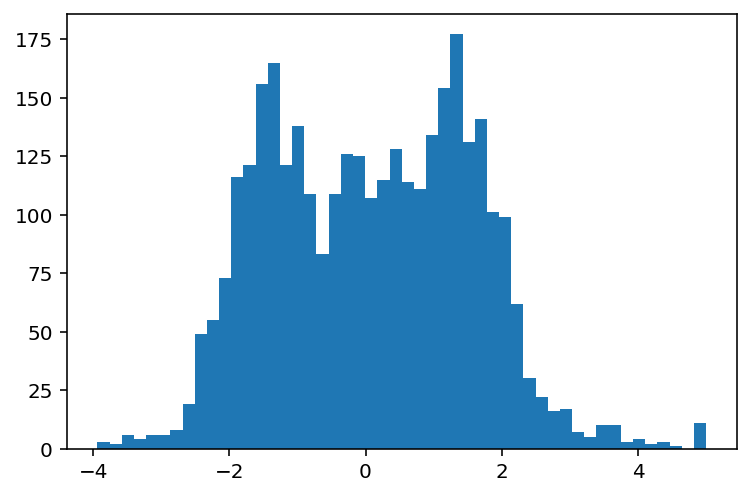

In [15]:
df_JD_min_hq = pd.read_csv(r"data/future_data/min_hq_JD.csv")[["datetime","close"]]
df_C_min_hq = pd.read_csv(r"data/future_data/min_hq_C.csv")[["datetime","close"]]
df_M_min_hq = pd.read_csv(r"data/future_data/min_hq_M.csv")[["datetime","close"]]

data = df_JD_min_hq.merge(df_C_min_hq,on="datetime").merge(df_M_min_hq,on="datetime")
data = data[data["datetime"]>"2019-01-01"]
data["type_1"] = data["close_x"]
data["type_2"] = 1*data["close_y"] + 0.5*data["close"]
data =data[["datetime","type_1","type_2"]]

grouped = rolling(data,w=345*15)
names = []
groups = []

count = 0
for name , group in grouped:
    count += 1
    if count % 15 ==0:
        names.append(name)
        groups.append(group)


results = Parallel(n_jobs=16, verbose=5, backend='loky', batch_size='auto') \
        (delayed(co_intergrate)(group) for group in groups)

df_result = pd.concat(results,keys = names)
df_result=df_result.reset_index().rename(columns={"level_0":"index","level_1":"datetime"})

df_result = df_result.set_index("datetime")
df_result.index = pd.to_datetime(df_result.index)

plt.figure(figsize=(15,3))
plt.plot(np.arange(len(df_result)),df_result["resid_std"])
plt.grid()

plt.show()
plt.hist(df_result["resid_std"],bins=50)

# 豆一--豆粕+豆油

In [ ]:
df_A_daily_hq = pd.read_csv(r"data/future_data/daily_hq_A.csv")
df_M_daily_hq = pd.read_csv(r"data/future_data/daily_hq_M.csv")
df_Y_daily_hq = pd.read_csv(r"data/future_data/daily_hq_Y.csv")

df_A_daily_hq["close"].plot()
plt.show()
df_M_daily_hq["close"].plot()
plt.show()
df_Y_daily_hq["close"].plot()
plt.show()

<Figure size 1080x216 with 0 Axes>

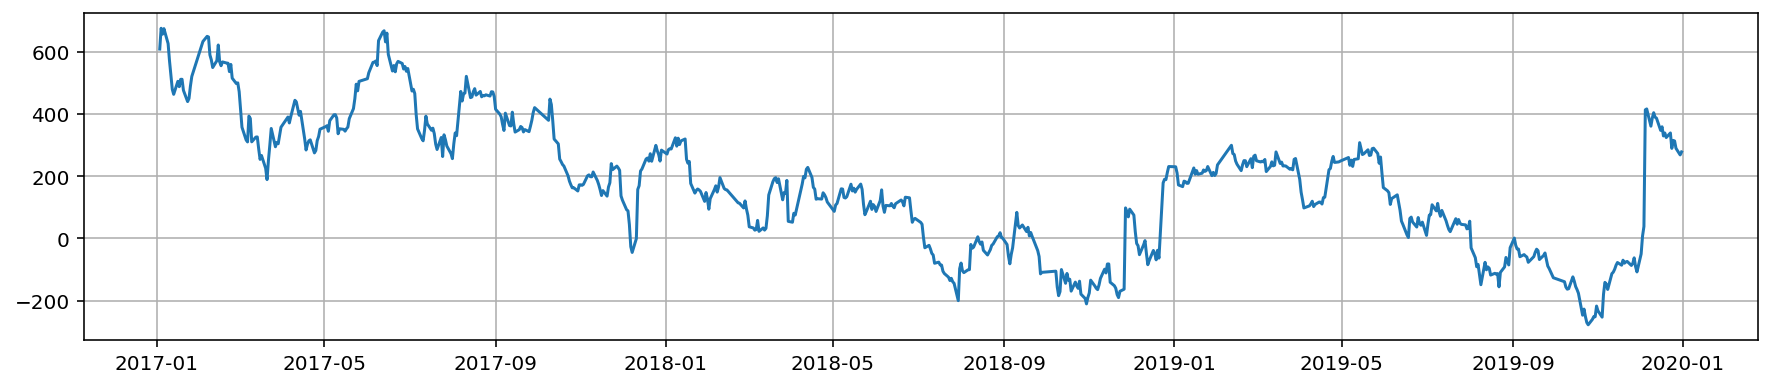

(array([ 2.,  1.,  4.,  1.,  1.,  1.,  1.,  1.,  2.,  3.,  5.,  8.,  8.,
         8.,  8.,  6.,  3., 14., 11.,  6., 16., 10.,  8., 10.,  8., 14.,
         7.,  6.,  2., 12.,  2.,  8., 11., 14., 11.,  7.,  8.,  6., 14.,
         7., 19., 11., 15.,  9., 10., 19., 10., 16.,  8., 10.,  8., 12.,
        16., 17., 12., 22.,  9., 15.,  6., 11., 10.,  7., 13.,  9.,  7.,
        12., 14.,  6.,  5.,  5., 10.,  6.,  5.,  2.,  1.,  4.,  6.,  9.,
         9.,  4.,  2.,  3.,  6.,  3.,  1.,  5.,  3.,  5., 10.,  3.,  0.,
         2.,  1.,  0.,  2.,  3.,  0.,  2.,  3.,  3.]),
 array([-278.   , -268.466, -258.932, -249.398, -239.864, -230.33 ,
        -220.796, -211.262, -201.728, -192.194, -182.66 , -173.126,
        -163.592, -154.058, -144.524, -134.99 , -125.456, -115.922,
        -106.388,  -96.854,  -87.32 ,  -77.786,  -68.252,  -58.718,
         -49.184,  -39.65 ,  -30.116,  -20.582,  -11.048,   -1.514,
           8.02 ,   17.554,   27.088,   36.622,   46.156,   55.69 ,
          65.224,   74.758

/home/ywang/env/dev/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  if __name__ == '__main__':


<Figure size 1080x216 with 0 Axes>

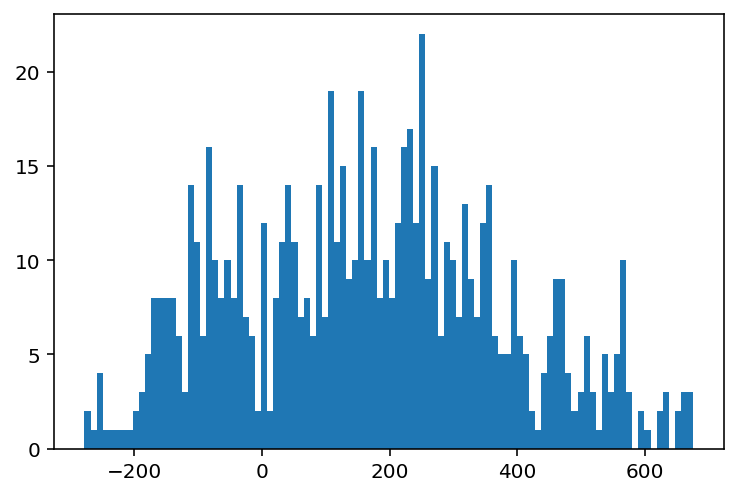

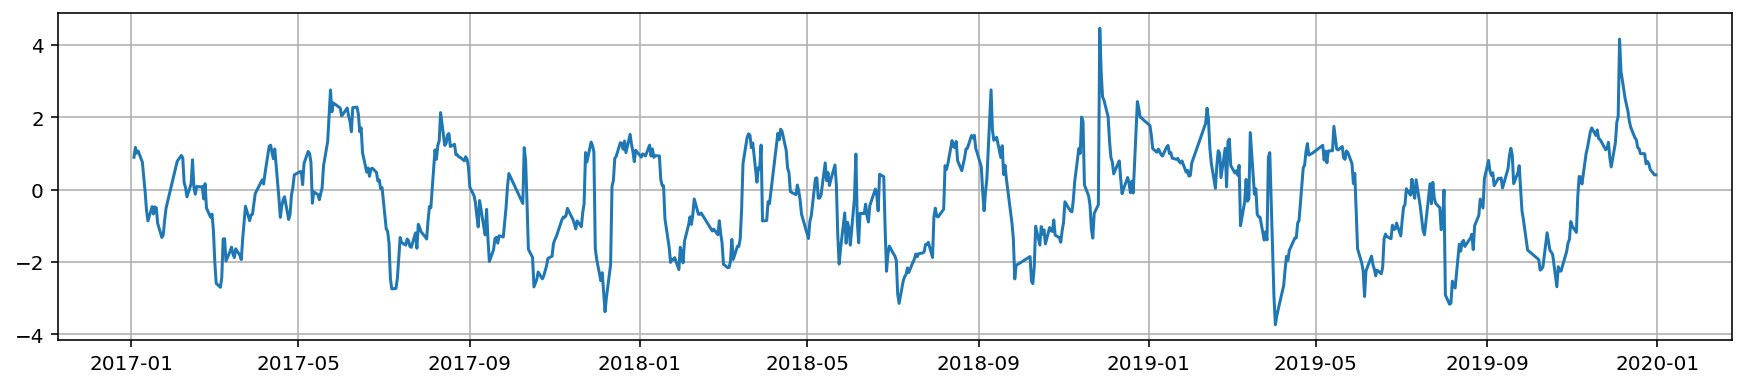

(array([ 1.,  0.,  1.,  0.,  1.,  1.,  1.,  2.,  0.,  3.,  3.,  0.,  6.,
         4.,  5.,  5.,  5.,  4., 12.,  9.,  7., 11., 12., 11.,  7., 11.,
        12., 15., 18., 18., 12., 12., 13., 11., 14., 18., 16., 16., 11.,
        17., 12.,  9., 13., 11., 14.,  8., 18., 13., 12., 16., 13., 14.,
        11., 13., 18., 16., 21., 20., 24., 24., 16., 14., 11.,  9.,  6.,
         7.,  4.,  2.,  4.,  4.,  6.,  4.,  2.,  5.,  2.,  2.,  2.,  0.,
         0.,  2.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.]),
 array([-3.73693303, -3.65494535, -3.57295767, -3.49096999, -3.40898231,
        -3.32699463, -3.24500695, -3.16301927, -3.08103159, -2.99904391,
        -2.91705623, -2.83506855, -2.75308087, -2.67109319, -2.58910551,
        -2.50711782, -2.42513014, -2.34314246, -2.26115478, -2.1791671 ,
        -2.09717942, -2.01519174, -1.93320406, -1.85121638, -1.7692287 ,
        -1.68724102, -1.60525334, -1.52326566, -1.44127798, -1.359290

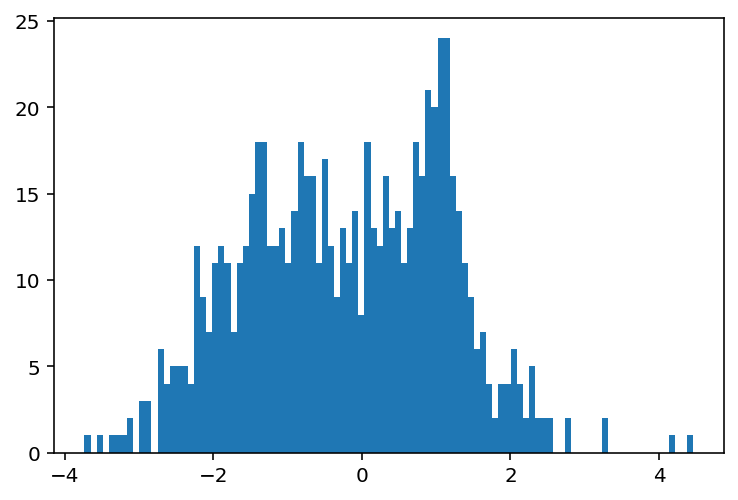

In [58]:
spread = df_A_daily_hq["close"] - 0.8*df_M_daily_hq["close"]-0.2*df_Y_daily_hq["close"]
plt.figure(figsize=(15,3))
plt.plot(pd.to_datetime(get_trade_dates("20170101","20191231")),spread[244:])
plt.grid()

plt.show()
plt.hist(spread[244:],bins = 100)

spread_std = spread.rolling(30).apply(lambda x:(x[-1]-np.mean(x))/np.std(x))
plt.figure(figsize=(15,3))
plt.plot(pd.to_datetime(get_trade_dates("20170101","20191231")),spread_std[244:])
plt.grid()

plt.show()
plt.hist(spread_std[244:],bins = 100)

[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  40 tasks      | elapsed:   14.5s
[Parallel(n_jobs=16)]: Done 130 tasks      | elapsed:   15.1s
[Parallel(n_jobs=16)]: Done 256 tasks      | elapsed:   16.3s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:   17.5s
[Parallel(n_jobs=16)]: Done 616 tasks      | elapsed:   19.3s
[Parallel(n_jobs=16)]: Done 850 tasks      | elapsed:   21.4s
[Parallel(n_jobs=16)]: Done 1120 tasks      | elapsed:   23.8s
[Parallel(n_jobs=16)]: Done 1426 tasks      | elapsed:   26.5s
[Parallel(n_jobs=16)]: Done 1768 tasks      | elapsed:   29.6s
[Parallel(n_jobs=16)]: Done 2146 tasks      | elapsed:   32.8s
[Parallel(n_jobs=16)]: Done 2560 tasks      | elapsed:   36.4s
[Parallel(n_jobs=16)]: Done 3010 tasks      | elapsed:   40.5s
[Parallel(n_jobs=16)]: Done 3496 tasks      | elapsed:   44.9s
[Parallel(n_jobs=16)]: Done 4018 tasks      | elapsed:   49.3s
[Parallel(n_jobs=16)]: Done 4576 tasks      | e

<Figure size 1080x216 with 0 Axes>

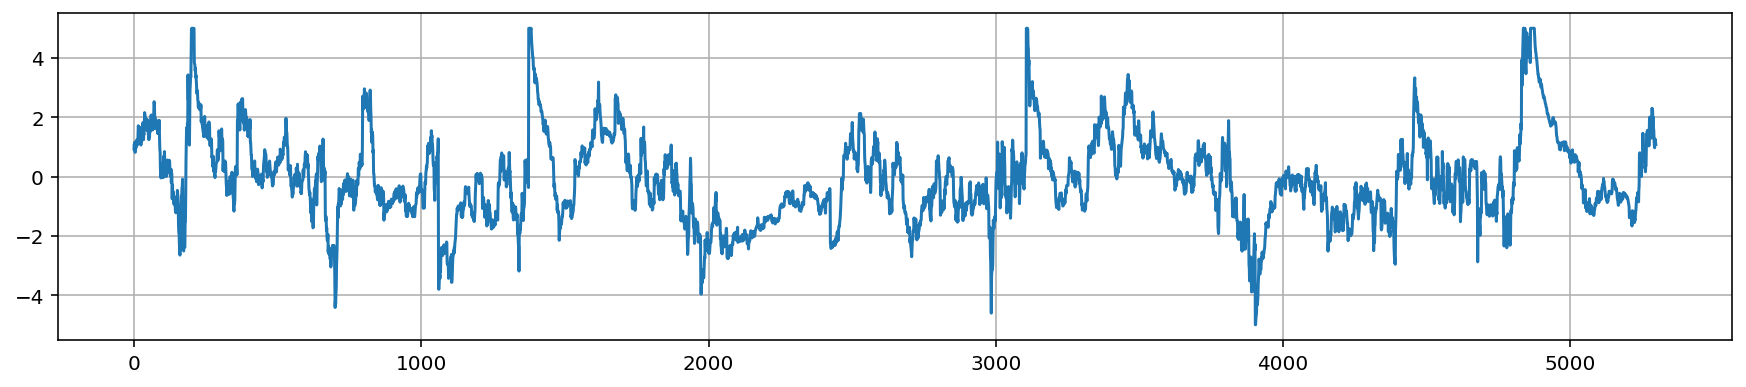

(array([  2.,   4.,   1.,   5.,   2.,   5.,  10.,  15.,  10.,  22.,  19.,
         40.,  63.,  88., 113., 121., 134., 188., 234., 312., 355., 337.,
        363., 317., 286., 297., 233., 253., 235., 190., 170., 136., 131.,
         98.,  97.,  78.,  50.,  67.,  45.,  22.,  19.,  22.,  11.,  12.,
          8.,  10.,  10.,   7.,   4.,  47.]),
 array([-5. , -4.8, -4.6, -4.4, -4.2, -4. , -3.8, -3.6, -3.4, -3.2, -3. ,
        -2.8, -2.6, -2.4, -2.2, -2. , -1.8, -1.6, -1.4, -1.2, -1. , -0.8,
        -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,
         1.6,  1.8,  2. ,  2.2,  2.4,  2.6,  2.8,  3. ,  3.2,  3.4,  3.6,
         3.8,  4. ,  4.2,  4.4,  4.6,  4.8,  5. ]),
 <a list of 50 Patch objects>)

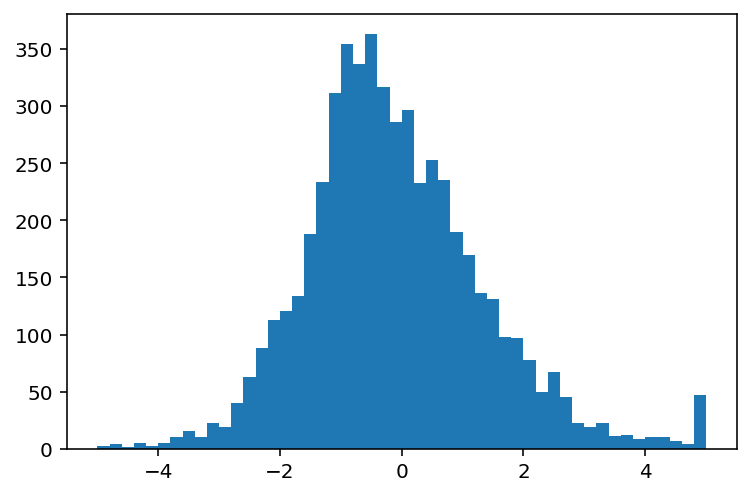

In [16]:
df_A_min_hq = pd.read_csv(r"data/future_data/min_hq_A.csv").iloc[-245*345-120:]
df_M_min_hq = pd.read_csv(r"data/future_data/min_hq_M.csv").iloc[-245*345-120:]
df_Y_min_hq = pd.read_csv(r"data/future_data/min_hq_Y.csv").iloc[-245*345-120:]

data = pd.concat([df_A_min_hq["datetime"],df_A_min_hq["close"],0.8*df_M_min_hq["close"] + 0.2 * df_Y_min_hq["close"]]
                  ,axis = 1,keys=["datetime","type_1","type_2"])



grouped = rolling(data,w=345*15)
names = []
groups = []

count = 0
for name , group in grouped:
    count += 1
    if count % 15 ==0:
        names.append(name)
        groups.append(group)


results = Parallel(n_jobs=16, verbose=5, backend='loky', batch_size='auto') \
        (delayed(co_intergrate)(group) for group in groups)

df_result = pd.concat(results,keys = names)
df_result=df_result.reset_index().rename(columns={"level_0":"index","level_1":"datetime"})

df_result = df_result.set_index("datetime")
df_result.index = pd.to_datetime(df_result.index)

plt.figure(figsize=(15,3))
plt.plot(np.arange(len(df_result)),df_result["resid_std"])
plt.grid()

plt.show()
plt.hist(df_result["resid_std"],bins=50)